In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('usdjpy.csv',  parse_dates=['年月日'], index_col=['年月日'])

In [3]:

df

,終値
年月日,
2021-01-04 07:00:00,103.222
2021-01-04 08:00:00,103.248
2021-01-04 09:00:00,103.064
2021-01-04 10:00:00,103.058
2021-01-04 11:00:00,102.983
...,...
2023-01-26 18:00:00,129.959
2023-01-26 19:00:00,129.680
2023-01-26 20:00:00,129.824


In [6]:
df["終値_遅行"] = df["終値"].shift(-26)

In [5]:
#変化率
df["終値_変化率"] = df["終値"].pct_change()
df

,終値,終値_遅行,終値_変化率
年月日,,,
2021-01-04 07:00:00,103.222,NaN,NaN
2021-01-04 08:00:00,103.248,NaN,0.000252
2021-01-04 09:00:00,103.064,NaN,-0.001782
2021-01-04 10:00:00,103.058,NaN,-0.000058
2021-01-04 11:00:00,102.983,NaN,-0.000728
...,...,...,...
2023-01-26 18:00:00,129.959,130.434,0.001125
2023-01-26 19:00:00,129.680,130.240,-0.002147
2023-01-26 20:00:00,129.824,129.850,0.001110


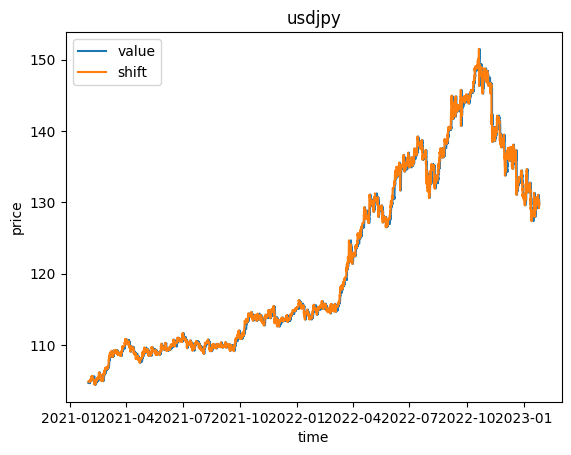

In [22]:
# グラフを描画
plt.plot(df.index, df["終値"], label="value")
plt.plot(df.index, df["終値_遅行"], label="shift")
plt.title("usdjpy")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

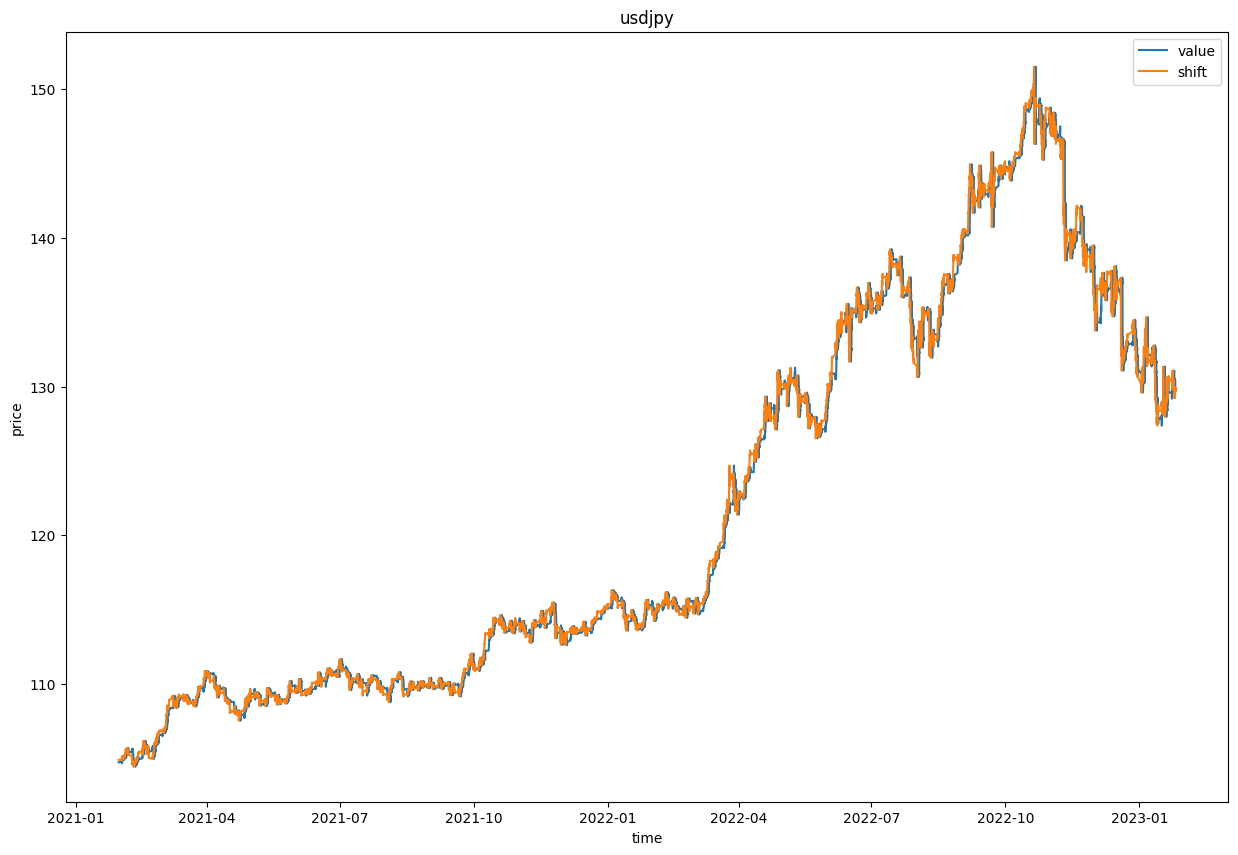

In [23]:
# グラフのサイズを指定
plt.figure(figsize=(15, 10))

# グラフを描画
plt.plot(df.index, df["終値"], label="value")
plt.plot(df.index, df["終値_遅行"], label="shift")
plt.title("usdjpy")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [9]:
#移動平均
df["終値_平均"] = df["終値"].rolling(480).mean()

In [10]:
df

,終値,終値_遅行,終値_変化率,終値_平均
年月日,,,,
2021-01-04 07:00:00,103.222,103.122,NaN,NaN
2021-01-04 08:00:00,103.248,103.128,0.000252,NaN
2021-01-04 09:00:00,103.064,103.113,-0.001782,NaN
2021-01-04 10:00:00,103.058,103.035,-0.000058,NaN
2021-01-04 11:00:00,102.983,102.995,-0.000728,NaN
...,...,...,...,...
2023-01-26 18:00:00,129.959,NaN,0.001125,130.597085
2023-01-26 19:00:00,129.680,NaN,-0.002147,130.588890
2023-01-26 20:00:00,129.824,NaN,0.001110,130.580581


In [11]:
# NaNを除去
df = df.dropna()

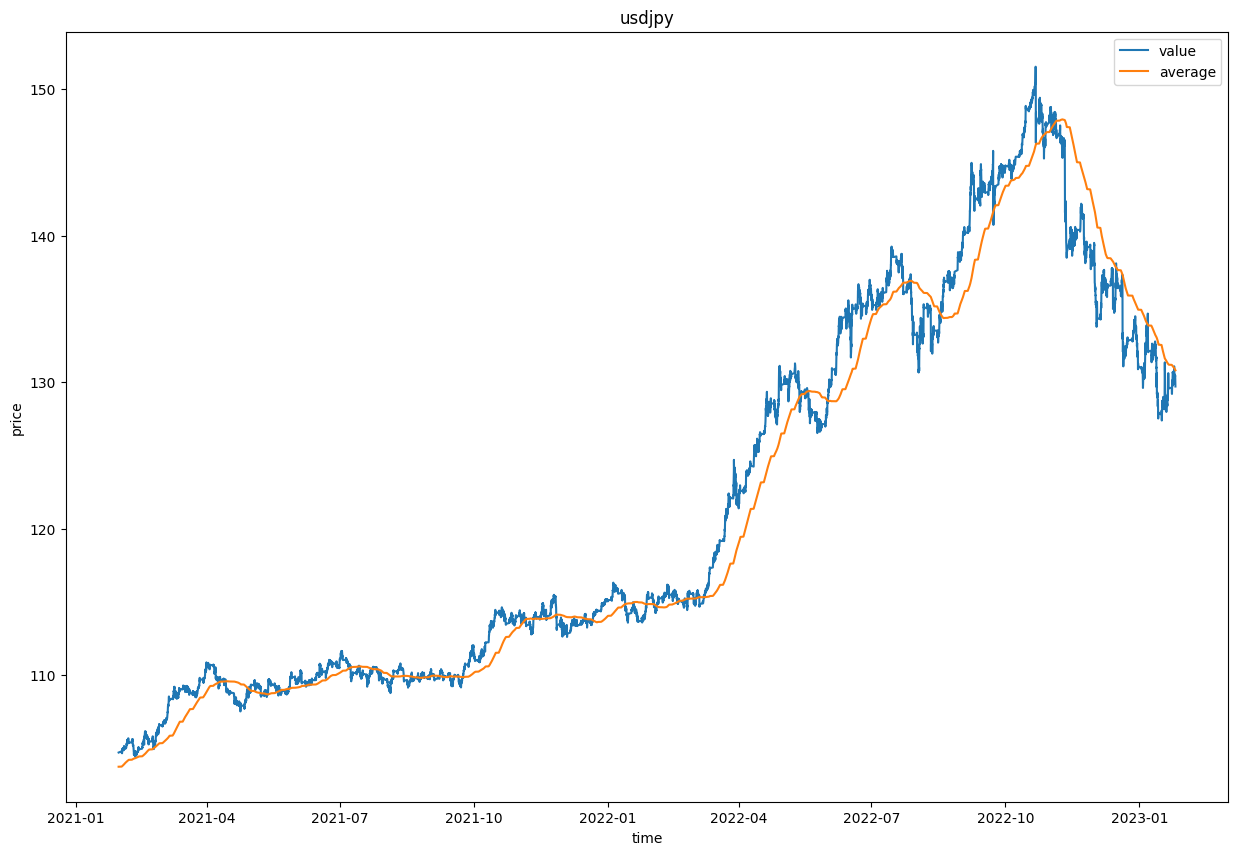

In [24]:
# グラフのサイズを指定
plt.figure(figsize=(15, 10))

# グラフを描画
plt.plot(df.index, df["終値"], label="value")
plt.plot(df.index, df["終値_平均"], label="average")
plt.title("usdjpy")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [15]:
df["終値_差分"] = df["終値"].diff()
df

,終値,終値_差分
年月日,,
2021-01-04 07:00:00,103.222,NaN
2021-01-04 08:00:00,103.248,0.026
2021-01-04 09:00:00,103.064,-0.184
2021-01-04 10:00:00,103.058,-0.006
2021-01-04 11:00:00,102.983,-0.075
...,...,...
2023-01-26 18:00:00,129.959,0.146
2023-01-26 19:00:00,129.680,-0.279
2023-01-26 20:00:00,129.824,0.144


In [16]:
df["終値_変化率"] = df["終値"].pct_change()
df

,終値,終値_差分,終値_変化率
年月日,,,
2021-01-04 07:00:00,103.222,NaN,NaN
2021-01-04 08:00:00,103.248,0.026,0.000252
2021-01-04 09:00:00,103.064,-0.184,-0.001782
2021-01-04 10:00:00,103.058,-0.006,-0.000058
2021-01-04 11:00:00,102.983,-0.075,-0.000728
...,...,...,...
2023-01-26 18:00:00,129.959,0.146,0.001125
2023-01-26 19:00:00,129.680,-0.279,-0.002147
2023-01-26 20:00:00,129.824,0.144,0.001110


In [13]:
import statsmodels.api as sm

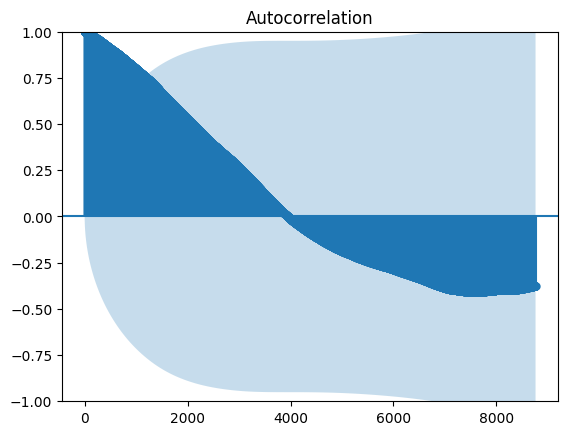

In [20]:
#　一年間の自己相関
res = sm.graphics.tsa.plot_acf(df["終値"],lags=8760)

In [ ]:
#day_summary = df.resample("D").agg({'prace': 'last'})